[Reference](https://hami-asmai.medium.com/relationship-extraction-from-any-web-articles-using-spacy-and-jupyter-notebook-in-6-steps-4444ee68763f)

In [1]:
!python -m spacy download en_core_web_sm
!pip install pandas
!pip install bs4

     |████████████████████████████████| 12.0 MB 6.8 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [2]:
import re
import csv
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import urllib.request 
from bs4 import BeautifulSoup

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [3]:
# indicate address for chosen URL
url = "https://www.rigzone.com/news/what_could_omicron_cost_global_oil_market-03-dec-2021-167199-article"
# open the URL for reading
html = urllib.request.urlopen(url)
# parsing the html file
htmlParse = BeautifulSoup(html, 'html.parser')

parsed_text = ""

for para in htmlParse.find_all("p"):
    #parsed_text_str += str(para.get_text())
    parsed_text = " ".join((parsed_text, str(para.get_text())))
    
    
sentences = [[i] for i in nlp(parsed_text).sents]

In [4]:
parsed_text

"  \n var ssdl = ssdl || {}  \n ssdl.editorialMetaData = { 'Country' : 'All', \n'Region' : 'All', \n'company' : '', \n'sector' : 'Industry_Headlines', \n'industry_sector' : 'Downstream,Upstream', \n'audience' : 'News', \n'content_type' : 'About the Industry', \n'company_sentiment' : 'Negative', \n'author' : 'Andreas Exarheas', \n'published_date' : '2021-12-03', \n'tag' : 'People_on_the_Move,Govt_Regulatory,Political_Social_Unrest,Health_Safety_Environment,Analysis_Trends', \n'longevity' : 'News', \n'content_origin' : 'Original Content', \n} \n  The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions. That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021

In [5]:
sentences

[[  
   var ssdl], [= ssdl || {}  
   ], [ssdl.editorialMetaData = { 'Country' : 'All', 
  'Region' : 'All', 
  'company' : '', 
  'sector' : 'Industry_Headlines', 
  'industry_sector' : 'Downstream,Upstream', 
  'audience' : 'News', 
  'content_type' : 'About the Industry', 
  'company_sentiment' : 'Negative', 
  'author' : 'Andreas Exarheas', 
  'published_date' : '2021-12-03', 
  'tag' : 'People_on_the_Move,Govt_Regulatory,Political_Social_Unrest,Health_Safety_Environment,Analysis_Trends', 
  'longevity' : 'News', 
  'content_origin' : 'Original Content', 
  } 
    The new Omicron variant of Covid-19 could cost the global oil market as much as 2.9 million barrels per day of demand in the first quarter of next year, bringing total demand down to 95.7 million barrels per day, if it triggers more lockdowns or restrictions.], [That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrel

In [6]:
myheaders = ['sentence']
myvalues = sentences
filename = 'article_text.csv'
with open(filename, 'w',newline='') as myfile:
    writer = csv.writer(myfile)
    writer.writerow(myheaders)
    writer.writerows(myvalues)

In [8]:
csv_sentences = pd.read_csv("article_text.csv")
csv_sentences

,sentence
0,\n var ssdl
1,= ssdl || {} \n
2,"ssdl.editorialMetaData = { 'Country' : 'All', \n'Region' : 'All', \n'company' : '', \n'sector' : 'Industry_Headlines', \n'industry_sector' : 'Downstream,Upstream', \n'audience' : 'News', \n'conten..."
3,"That’s according to Rystad Energy, which warned that, if the variant spreads rapidly, oil demand could fall by 1.3 million barrels per day, to 97.8 million barrels per day, in December 2021 and by..."
4,"The company noted, however, that as countries and governments learn to live with the Omicron variant, or vaccine manufacturers adapt existing shots to counter the variant, the full-year impact wil..."
5,"Average 2022 demand would fall to 98 million barrels per day, according to Rystad, which highlighted that this was a drop of 2.1 million barrels per day against its current base case scenario."
6,"“The likelihood of increasing lockdowns in the coming months has risen dramatically due to the new Omicron variant, and this will undoubtedly impact global oil demand,” Claudio Galimberti, Rystad’..."
7,"“Given the early stage of the variant outbreak and the unknowns related to contagiousness and vaccine efficacy, we can only hope this scenario turns out to be a false alarm."
8,"Still, if the risk is real, the oil market will need to recalibrate accordingly,” he added in the statement."
9,Omicron Product Impact


In [9]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [10]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [12]:
entity_pairs = []
for i in tqdm(csv_sentences["sentence"]):
    entity_pairs.append(get_entities(i))

100%|██████████| 37/37 [00:00<00:00, 41.85it/s]


In [13]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1",[pattern]) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [14]:
get_relation("John completed the task")

'completed'

In [15]:
relations = [get_relation(i) for i in tqdm(csv_sentences['sentence'])]

100%|██████████| 37/37 [00:00<00:00, 68.21it/s]


In [16]:
pd.Series(relations).value_counts()[:50]

ssdl                            2
announced                       2
is                              2
added in                        2
That                            2
said in                         2
“                               1
added                           1
admitted                        1
reported to                     1
been                            1
highlighted                     1
risen for                       1
show                            1
impacted                        1
shows                           1
see                             1
andreas.exarheas@rigzone.com    1
hope                            1
Impact                          1
fall by                         1
revealed                        1
fall to                         1
Cases                           1
email                           1
said                            1
think                           1
warned                          1
cost                            1
love          

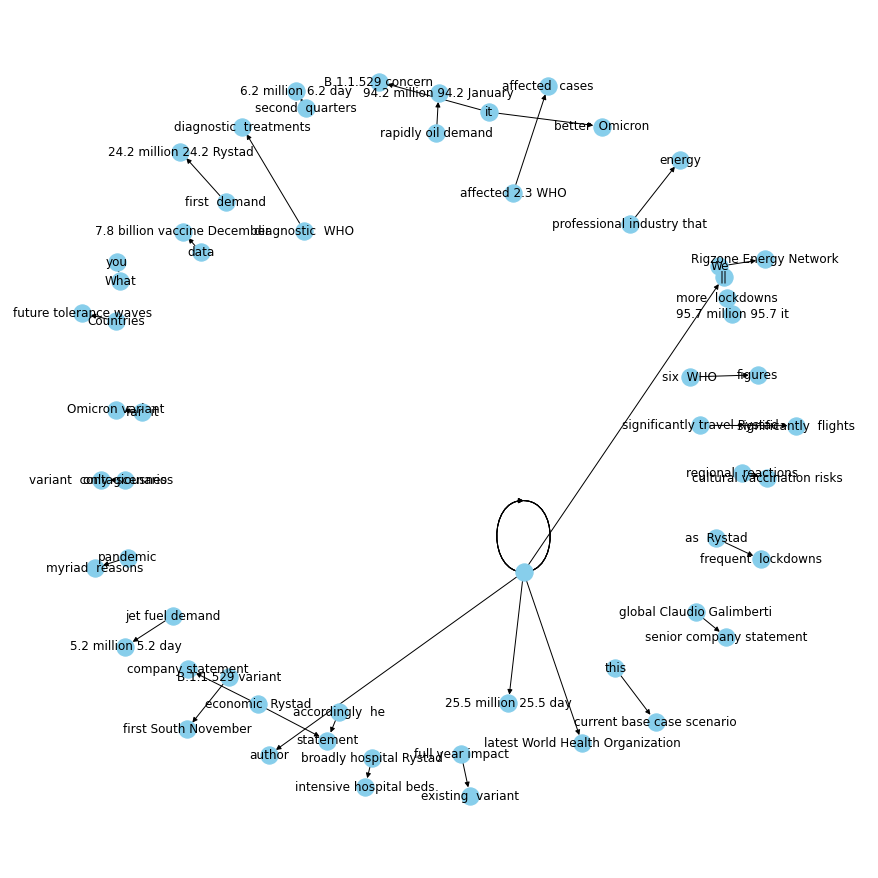

In [17]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())
                          

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

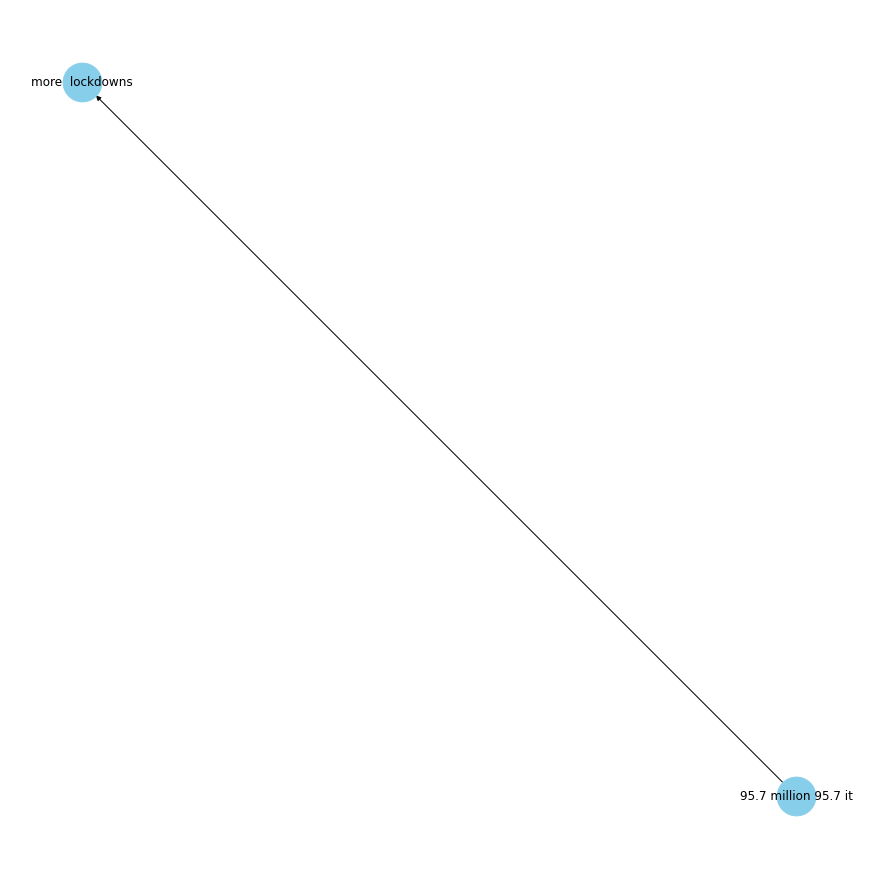

In [18]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="cost"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()